Assignment by: Josef Hasm Agunod

# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

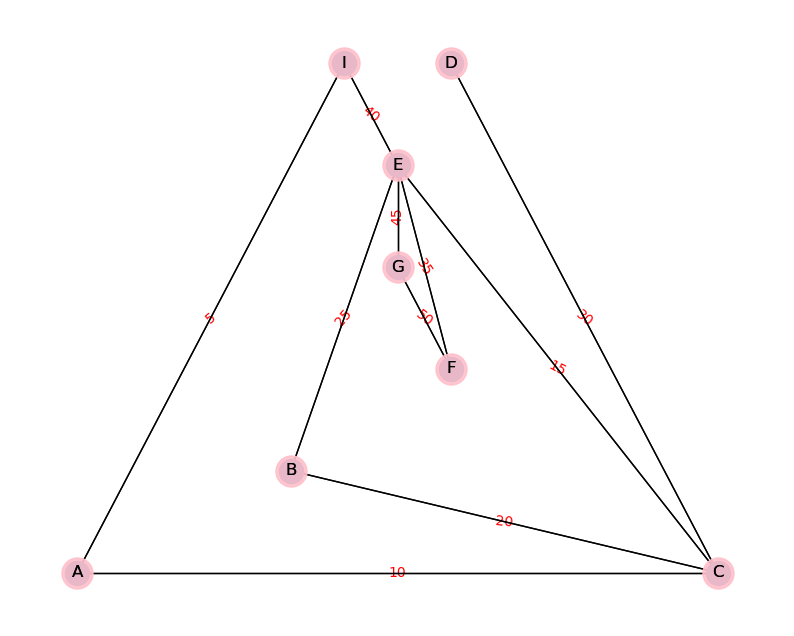

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

### $\textbf{Kruskal's Algorithm}$


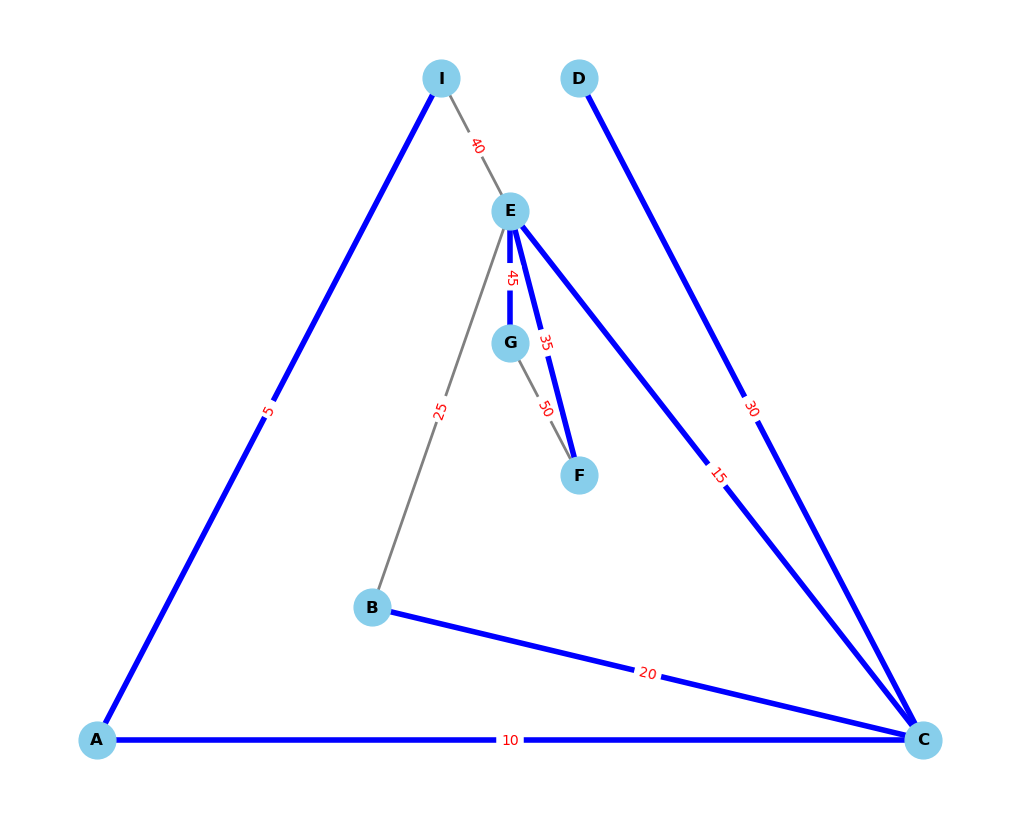

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_algorithm(G):
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    
    # Sort edges by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    
    # Create a disjoint set data structure
    disjoint_set = {node: {node} for node in G.nodes()}
    
    # Iterate through the sorted edges
    for u, v, data in sorted_edges:
        if find(disjoint_set, u) != find(disjoint_set, v):
            # Add the edge to the minimum spanning tree
            MST.add_edge(u, v, **data)
            
            # Merge the sets containing u and v
            union(disjoint_set, u, v)
            
    return MST

def find(disjoint_set, node):
    return next(iter([k for k, v in disjoint_set.items() if node in v]))

def union(disjoint_set, u, v):
    root_u = find(disjoint_set, u)
    root_v = find(disjoint_set, v)
    if root_u != root_v:
        disjoint_set[root_u].update(disjoint_set[root_v])
        del disjoint_set[root_v]


# Example usage:
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

mst = kruskal_algorithm(G)
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', width=2)

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='blue', width=4)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()



| Edge | Endpoints | Weight | Action |
| :-: | :-: | :-: | :-: |
| 1 | (A, I) | 5 | connected |
| 2 | (A, C) | 10 | connected |
| 3 | (C, E) | 15 | connected |
| 4 | (B, C) | 20 | connected |
| 5 | (B, E) | 25 | not connected |
| 6 | (C, D) | 30 | connected |
| 7 | (E, F) | 35 | connected |
| 8 | (E, I) | 40 | not connected |
| 9 | (E, G) | 45 | connected |
| 10 | (F, G) | 50 | not connected |

### $\textbf{Primm's Algorithm}$


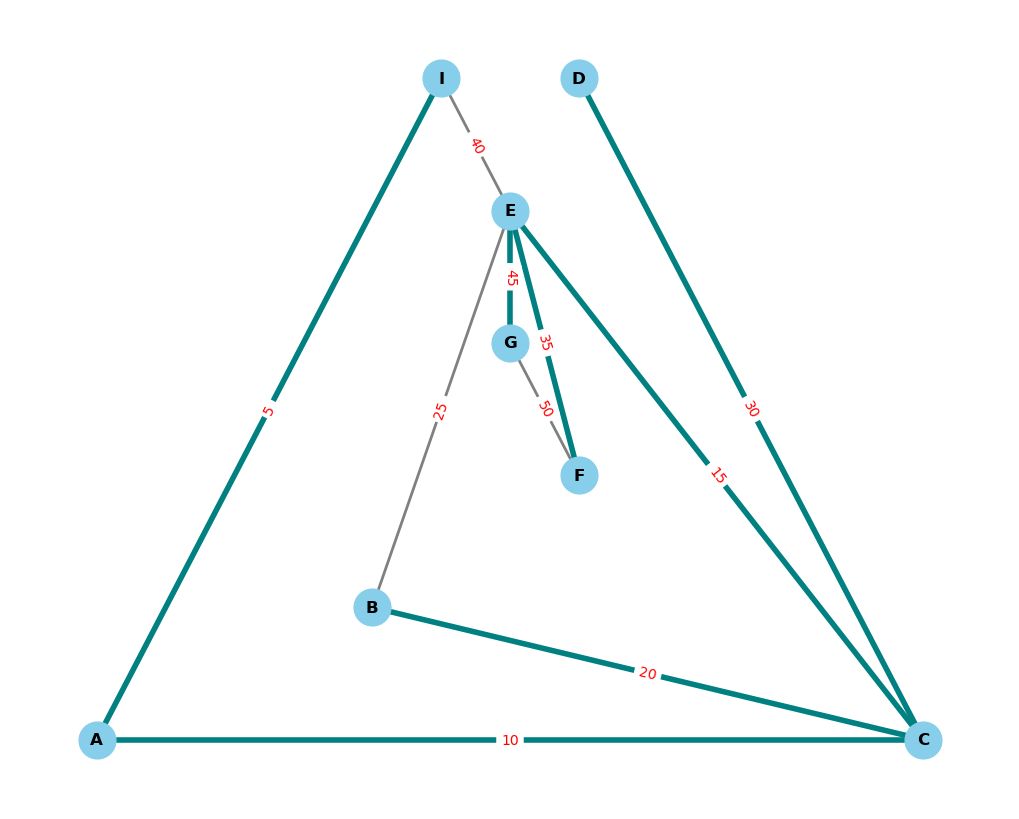

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def prim_mst(graph):
    mst = nx.Graph()
    start_node = list(graph.nodes())[0]
    visited = {start_node}
    
    while len(visited) < len(graph.nodes()):
        min_edge = None
        min_weight = float('inf')
        
        for node in visited:
            for neighbor, edge_attr in graph[node].items():
                if neighbor not in visited and edge_attr['weight'] < min_weight:
                    min_edge = (node, neighbor)
                    min_weight = edge_attr['weight']
        
        if min_edge:
            mst.add_edge(*min_edge, weight=min_weight)
            visited.add(min_edge[1])
    
    return mst

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

mst = prim_mst(G)
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', width=2)

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='teal', width=4)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

| Iteration Number | Vertex Added | Edge Added | Weight |
| :-: | :-: | :-: | :-: |
| 0 | E |  |  |
| 1 | C | (C, E) | 15 |
| 2 | A | (A, C) | 10 |
| 3 | I | (A, I) | 5 |
| 4 | B | (C, B) | 20 |
| 5 | D | (C, D) | 30 |
| 6 | F | (E, F) | 35 |
| 7 | G | (E, G) | 45 |

### $\textbf{Dijkstra's Shortest Path Algorithm}$

Shortest distances from node A : {'A': 0, 'B': 30, 'C': 10, 'D': 40, 'E': 25, 'F': 60, 'G': 70, 'I': 5} 

Shortest distances from node B : {'A': 30, 'B': 0, 'C': 20, 'D': 50, 'E': 25, 'F': 60, 'G': 70, 'I': 35} 

Shortest distances from node C : {'A': 10, 'B': 20, 'C': 0, 'D': 30, 'E': 15, 'F': 50, 'G': 60, 'I': 15} 

Shortest distances from node D : {'A': 40, 'B': 50, 'C': 30, 'D': 0, 'E': 45, 'F': 80, 'G': 90, 'I': 45} 

Shortest distances from node E : {'A': 25, 'B': 25, 'C': 15, 'D': 45, 'E': 0, 'F': 35, 'G': 45, 'I': 30} 

Shortest distances from node F : {'A': 60, 'B': 60, 'C': 50, 'D': 80, 'E': 35, 'F': 0, 'G': 50, 'I': 65} 

Shortest distances from node G : {'A': 70, 'B': 70, 'C': 60, 'D': 90, 'E': 45, 'F': 50, 'G': 0, 'I': 75} 

Shortest distances from node I : {'A': 5, 'B': 35, 'C': 15, 'D': 45, 'E': 30, 'F': 65, 'G': 75, 'I': 0} 



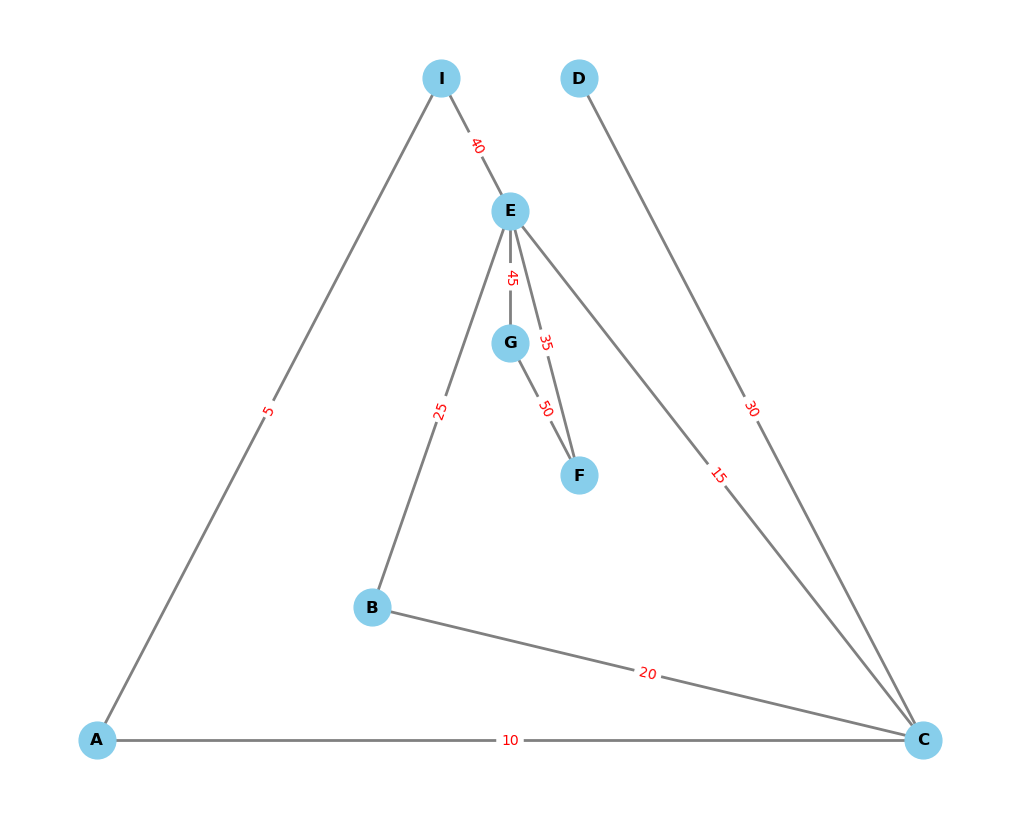

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distance = {node: float('inf') for node in graph.nodes()}
    distance[start] = 0
    visited = set()
    
    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=lambda x: distance[x])
        visited.add(current_node)
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_distance = distance[current_node] + graph[current_node][neighbor].get('weight', 1)
                if new_distance < distance[neighbor]:
                    distance[neighbor] = new_distance
    
    return distance

# Create a graph
G = nx.Graph()
plt.figure(figsize=(10, 8))

nodes = ["A","B","C","D","E","F","G","I"]
G.add_nodes_from([nodes)
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Calculate shortest distances using Dijkstra's algorithm
for x in nodes:
    start_node = x
    distances = dijkstra(G, start_node)
    print("Shortest distances from node", start_node, ":", distances,"\n")

# Plot the graph
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', width=2)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')

plt.show()


<b> Shortest distances from node A : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 0 |
| B | 30 |
| C | 10 |
| D | 40 |
| E | 25 |
| F | 60 |
| G | 70 |
| I | 5 |

<br>

<b> Shortest distances from node B : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 30 |
| B | 0 |
| C | 20 |
| D | 50 |
| E | 25 |
| F | 60 |
| G | 70 |
| I | 35 |

<br>

<b> Shortest distances from node C : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 10 |
| B | 20 |
| C | 0 |
| D | 30 |
| E | 15 |
| F | 50 |
| G | 60 |
| I | 15 |

<br>

<b> Shortest distances from node D : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 40 |
| B | 50 |
| C | 30 |
| D | 0 |
| E | 45 |
| F | 80 |
| G | 90 |
| I | 45 |

<br>

<b> Shortest distances from node E : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 25 |
| B | 25 |
| C | 15 |
| D | 45 |
| E | 0 |
| F | 35 |
| G | 45 |
| I | 30 |

<br>

<b> Shortest distances from node F : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 60 |
| B | 60 |
| C | 50 |
| D | 80 |
| E | 35 |
| F | 0 |
| G | 50 |
| I | 65 |

<br>

<b> Shortest distances from node G : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 70 |
| B | 70 |
| C | 60 |
| D | 90 |
| E | 45 |
| F | 50 |
| G | 0 |
| I | 75 |

<br>

<b> Shortest distances from node I : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 5 |
| B | 35 |
| C | 15 |
| D | 45 |
| E | 30 |
| F | 65 |
| G | 75 |
| I | 0 |

<br>